# Scan Plane Example Notebook
-------------------------

### Set up notebook to display images and interactive plots:

In [3]:
%matplotlib ipympl
from IPython.display import Image
%matplotlib ipympl

### Import Microscope class:

In [4]:
from microscope import SusceptometerMicroscope

### Initialize microscope object using configuration file:
#### Useful information will be printed to the screen and logged to 'scan_plane_example.log'

In [5]:
config_file = 'config_microscope.json'
m = SusceptometerMicroscope(config_file, 'RT', log_name='scan_plane_example')

INFO:2018-06-08_11:17:18:microscope:Logging started.
INFO:2018-06-08_11:17:18:microscope:Initializing microscope object using file config_microscope.json.
INFO:2018-06-08_11:17:18:atto:Initializing Attocube controller.


attocube ANC300 controller version 1.1.0-1304 2013-10-17 08:16


INFO:2018-06-08_11:17:25:microscope:Attocube controller successfully added to microscope.
INFO:2018-06-08_11:17:25:microscope:Scanner successfully added to microscope.
INFO:2018-06-08_11:17:25:microscope:Susceptometer(SQUID) successfully added to microscope.


Connected to: Stanford_Research_Systems SR830 (serial:s/n53956, firmware:ver1.07) in 0.04s


INFO:2018-06-08_11:17:25:microscope:SUSC_lockin successfully added to microscope.


Connected to: Stanford_Research_Systems SR830 (serial:s/n53182, firmware:ver1.07) in 0.04s


INFO:2018-06-08_11:17:26:microscope:CAP_lockin successfully added to microscope.


### These are the instruments contained in the microscope. Their metadata will automatically be saved.

In [6]:
m.components

{'atto': <ANC300: atto>,
 'benders': <Scanner: benders>,
 'SQUID': <Susceptometer: SQUID>,
 'SUSC_lockin': <SR830: SUSC_lockin>,
 'CAP_lockin': <SR830: CAP_lockin>}

### There are several different ways to drive the scanner.

In [7]:
m.goto([1,1,1])

INFO:2018-06-08_11:17:26:scanner:Moved scanner from [0, 0, 0] V to [1, 1, 1] V.


In [8]:
m.scanner.retract()

INFO:2018-06-08_11:17:28:scanner:Moved scanner from [1, 1, 1] V to [1, 1, -2] V.


In [9]:
m.scanner.position([0.5,1,-0.5])

INFO:2018-06-08_11:17:29:scanner:Moved scanner from [1, 1, -2] V to [0.5, 1, -0.5] V.


In [10]:
m.scanner.goto([0,0,0])

INFO:2018-06-08_11:17:29:scanner:Moved scanner from [0.5, 1, -0.5] V to [0, 0, 0] V.


### In order to run scan_plane, we have to trick the microscope into thinking it has acquired a plane:

In [11]:
m.scanner.metadata['position'].update({'plane': {'x': 0.1, 'y': 0.1, 'z': 0.1}, 'plane_is_current': True})

### Load measurement configuration file:

In [12]:
import json
with open('config_measurements.json') as f:
    measurements = json.load(f)

### Run the scan:

In [13]:
data, plot = m.scan_plane(measurements['scan'])

INFO:2018-06-08_11:17:30:utils:Scan parameters are valid. Starting scan.
INFO:2018-06-08_11:17:30:microscope:Setting amplitude on SUSC_lockin to 1 V.
INFO:2018-06-08_11:17:30:microscope:Setting frequency on SUSC_lockin to 131.79 Hz.
INFO:2018-06-08_11:17:30:microscope:Setting amplitude on CAP_lockin to 1 V.
INFO:2018-06-08_11:17:30:microscope:Setting frequency on CAP_lockin to 18437.0 Hz.
INFO:2018-06-08_11:17:32:scanner:Moved scanner from [0, 0, 0] V to [-2.0, -2.0, -0.5] V.


FigureCanvasNbAgg()

Started at 2018-06-08 11:17:32


INFO:2018-06-08_11:20:31:scanner:Moved scanner from [2.0, 2.0, 0.3] V to [0, 0, 0] V.
INFO:2018-06-08_11:20:31:microscope:Scan completed. DataSet saved to data/2018-06-08/#013_scan_11-17-32.


DataSet:
   location = 'data/2018-06-08/#013_scan_11-17-32'
   <Type>   | <array_id>             | <array.name> | <array.shape>
   Setpoint | benders_position_y_set | position_y   | (50,)
   Measured | daq_ai_voltage         | voltage      | (50, 4, 50)
Finished at 2018-06-08 11:20:31


### Import the resulting plot as an image so that it will appear if we export the notebook as HTML:

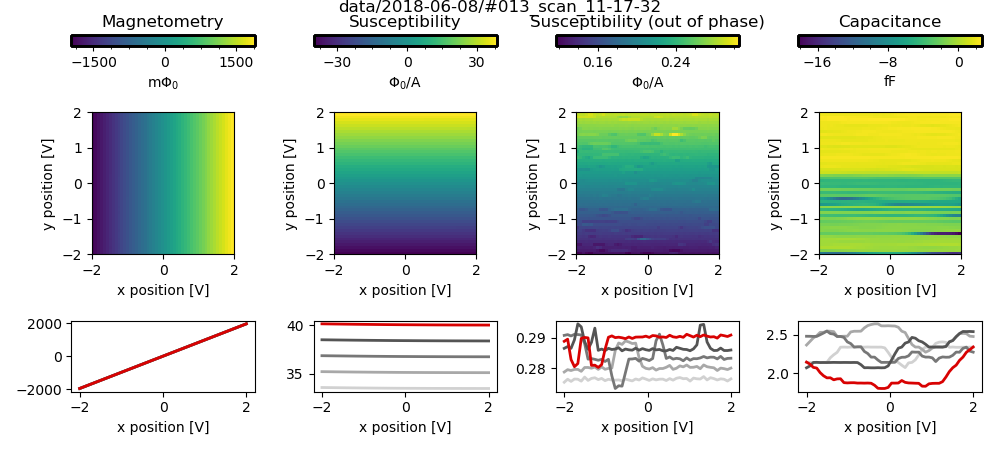

In [14]:
Image(filename=data.location + '/' + measurements['scan']['fname'] + '.png')

### Now let's change the fast axis of the scan from $x$ to $y$:

In [15]:
print(measurements['scan']['fast_ax'])

x


In [16]:
measurements['scan']['fast_ax'] = 'y'

In [17]:
print(measurements['scan']['fast_ax'])

y


In [18]:
data, plot = m.scan_plane(measurements['scan'])

INFO:2018-06-08_11:20:31:utils:Scan parameters are valid. Starting scan.
INFO:2018-06-08_11:20:31:microscope:Setting amplitude on SUSC_lockin to 1 V.
INFO:2018-06-08_11:20:31:microscope:Setting frequency on SUSC_lockin to 131.79 Hz.
INFO:2018-06-08_11:20:31:microscope:Setting amplitude on CAP_lockin to 1 V.
INFO:2018-06-08_11:20:31:microscope:Setting frequency on CAP_lockin to 18437.0 Hz.
INFO:2018-06-08_11:20:33:scanner:Moved scanner from [0, 0, 0] V to [-2.0, -2.0, -0.5] V.


FigureCanvasNbAgg()

Started at 2018-06-08 11:20:34


INFO:2018-06-08_11:23:31:scanner:Moved scanner from [2.0, 2.0, 0.3] V to [0, 0, 0] V.
INFO:2018-06-08_11:23:31:microscope:Scan completed. DataSet saved to data/2018-06-08/#014_scan_11-20-34.


DataSet:
   location = 'data/2018-06-08/#014_scan_11-20-34'
   <Type>   | <array_id>             | <array.name> | <array.shape>
   Setpoint | benders_position_x_set | position_x   | (50,)
   Measured | daq_ai_voltage         | voltage      | (50, 4, 50)
Finished at 2018-06-08 11:23:31


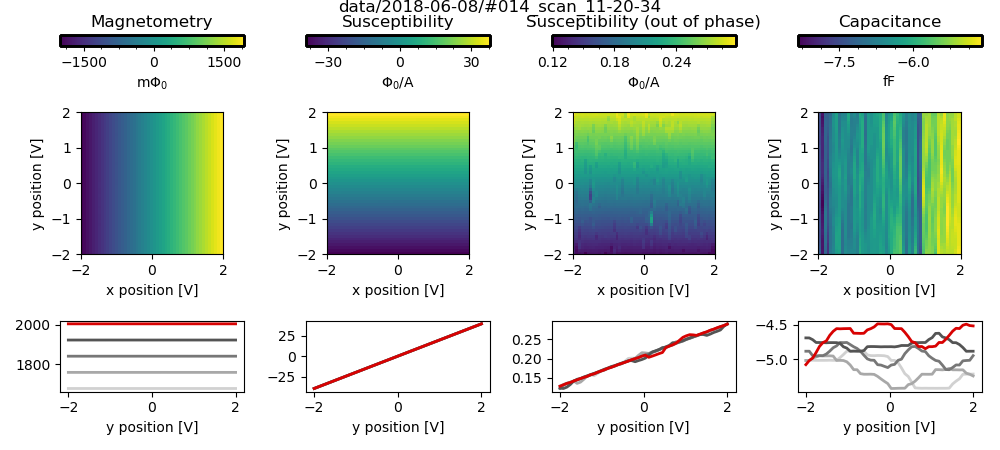

In [19]:
Image(filename=data.location + '/' + measurements['scan']['fname'] + '.png')